# Punto 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import brownian_motion as bm 
from scipy.stats import jarque_bera

(100,)


(array([ 20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

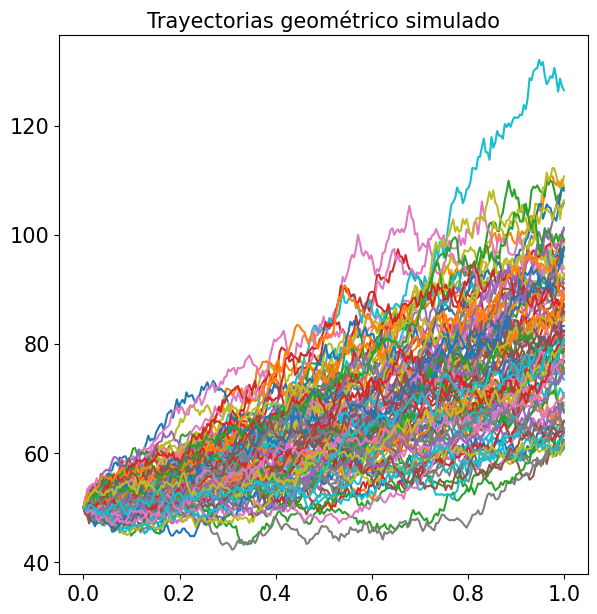

In [15]:
#Numeral 2
T=1
n=253
d=10000
time=np.linspace(0,T,n)
dt=T/(n-1)
dB=bm.get_dB(n,dt)
G_0=50*np.ones(d)

mu=0.3
sigma=0.2

def EM_geom_brown(G_0:np.array,mu:float,sigma:float,n:int,d:int,dt:float =1):
    """ 
    Generar matriz (dxn) con d trayectorias de movimientos brownianos geométricos de n observaciones a partir de 
    discretización de Euler Maruyama.
    Recibe:
    G_0: condiciones iniciales
    n: número de observaciones por trayectoria.
    d: número de trayectorias.
    dt (opcional): diferencial de tiempo.
    Retorna:
    Matriz de movimientos brownianos geométricos"""
    G_0=np.array(G_0)
    if G_0.ndim!=1 or len(G_0)!=d:
        raise Exception("Dimensiones de condiciones iniciales equivocadas")
    print(G_0.shape)
    G=np.zeros((d,n))
    G[:,0]=G_0
    B=bm.get_B_matrix(n,d,dt)
    dB=np.diff(B,axis=1)
    for i in range(1,n):
        G[:,i]=(1+mu*dt)*G[:,i-1]+sigma*G[:,i-1]*dB[:,i-1]
    return G

G=EM_geom_brown(G_0,0.5,0.2,n,d,dt=dt)


fig = plt.figure(figsize=(15, 7))

title = "Trayectorias geométrico simulado"
plt.subplot(1, 2, 1)
plt.plot(time,G.T) #basta plt.plot(dB.T) si el dt=1
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)




In [17]:
a=np.array([[2,3]])
a.ndim

2